In [14]:
# Data Cleaning Notebook - Phelps et al. 2016 Glass Dataset
# Simple data cleaning procedures before analysis

# ============================================================================
# CELL 1: Import Libraries
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("Libraries imported successfully")
print("Starting data cleaning process...")


Libraries imported successfully
Starting data cleaning process...


In [17]:
# ============================================================================
# CELL 2: Load Raw Data
# ============================================================================

# Load the Excel file
file_path = '/app/data/raw/Phelps2016.xlsx'

try:
    df_raw = pd.read_excel(file_path)
    print(f"✅ Data loaded successfully")
    print(f"Original dataset shape: {df_raw.shape}")
except FileNotFoundError:
    print("❌ File not found. Check the file path.")
    print("Available files in data/raw/:")
    print(list(Path('/app/data/raw/').glob('*')))

# Display first few rows
print("\nFirst 5 rows of raw data:")
df_raw.head()

✅ Data loaded successfully
Original dataset shape: (128, 91)

First 5 rows of raw data:


,sample_ID,sample,site_ID,site,chronology1,chronology2,original_chronology,translucency,colour,original_colour,macro_type,type,macro_composition,composition,original_composition,sio,nao,cao,alo,ko,mgo,feo,mno,tio,po,cuo,coo,pbo,sbo,sno,sro,bao,zno,cro,zro,moo,vo,Li,B,Na,Mg,Al,P,K,Ca,Ti,V,Cr,Mn,Fe,Co,Ni,Cu,Zn,Ga,As,Rb,Sr,Y,Zr,Nb,Mo,Cd,In,Sn,Sb,Cs,Ba,La,Ce,Pr,Nd,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,W,Pt,Au,Pb,Bi,Th,U
0,phelps2016_90,RAM 5947 08,RAM,Ramla,8,8,"Early-mid 8th century, Umayyad",translucent,blue,smokey pale blue,NaN,NaN,egypt_1,egypt_1,N-3,69.864728,14.496476,9.660532,2.636631,0.212505,0.521082,0.987554,NaN,0.287415,0.091603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,204.017006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.766654,40.621110,194.041255,NaN,3.43112,7.050818,3.468231,17.060637,3.366861,2.703013,4.357285,196.617150,8.926586,265.745520,4.845577,0.01285,0.107791,NaN,18.407348,0.158813,0.030797,167.917932,8.878543,16.541480,2.091641,8.317145,1.581652,0.374280,1.444857,0.241404,1.479647,0.309358,0.891833,0.120690,1.042985,0.140898,5.900164,0.284891,0.059129,0.001937,bdl,6.197818,0.010017,2.075708,1.201727
1,phelps2016_99,RAM 5947 20,RAM,Ramla,8,8,"Early-mid 8th century, Umayyad",translucent,blue,cobalt blue,NaN,NaN,egypt_1,egypt_1,N-3,70.518548,12.503187,9.896012,2.012075,0.976668,1.778057,0.793543,NaN,0.194823,0.213082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,295.383646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.580097,45.507714,1107.217816,NaN,12.23085,11.820332,67.279574,46.650019,2.667155,2.99309,6.712272,397.537245,7.735308,205.851635,3.636244,0.914803,0.259541,NaN,32.229106,4.488625,0.049693,161.819249,8.170596,15.711262,1.828348,6.916028,1.535438,0.381274,1.033363,0.206193,1.214839,0.289110,0.786686,0.110870,0.806042,0.110215,4.860550,0.215671,0.122145,0.015401,0.015946,337.487005,0.062638,1.738104,0.962323
2,phelps2016_08,AH 3746 05,AHI,Ahihud,8,8,"Early-mid 8th century, Umayyad",translucent,blue_green,pale blue,NaN,NaN,egypt_1,egypt_1,N-3,71.232169,12.852251,9.516464,2.827478,0.619012,0.736862,0.755832,NaN,0.169598,0.184722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.030285,267.893297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.518373,33.394416,1615.220450,NaN,5.294652,9.184272,123.938698,35.127970,3.549956,2.612769,8.257851,364.710419,8.760924,148.355691,3.185880,0.522913,bdl,NaN,38.261211,77.001388,bdl,214.479199,7.975384,15.139348,1.859870,7.589613,1.503560,0.314938,1.413000,0.211740,1.346036,0.270256,0.770924,0.115964,0.762477,0.112779,3.263992,0.179061,0.118618,0.012942,0.018502,306.790659,0.017358,1.460000,0.974371
3,phelps2016_10,AH 3746 09,AHI,Ahihud,8,8,"Early-mid 8th century, Umayyad",translucent,blue_green,greenish blue,NaN,NaN,egypt_1,egypt_1,N-3,70.252829,12.305012,10.634114,3.059662,0.627462,0.783204,0.809936,NaN,0.179708,0.227146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.263923,277.482247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.317224,35.768487,1621.373473,NaN,5.147274,9.365795,124.933714,46.807310,3.556084,3.100774,9.067838,392.368862,9.773685,164.655851,3.386776,0.644668,bdl,NaN,45.235583,70.705931,bdl,227.299352,8.651823,16.192423,2.071317,8.202734,1.639363,0.303017,1.474446,0.242747,1.430890,0.311599,0.782933,0.128886,0.913678,0.142259,3.501249,0.186775,0.141666,bdl,0.019603,294.871124,0.019761,1.632004,1.093745
4,phelps2016_100,RAM 5947 21,RAM,Ramla,8,8,"Early-mid 8th century, Umayyad",translucent,blue_green,greenish blue,NaN,NaN,egypt_1,egypt_1,N-3,68.041447,16.624375,9.434951,2.381466,0.387269,0.536134,0.977467,NaN,0.275471,0.111490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.142882,232.146401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.963201,60.792735,220.770326,NaN,3.218177,7.615037,8.528913,19.275766,3.360279,5.670208,7.344182,209.446486,8.675460,280.039856,4.681108,0.464618,0.040237,NaN,14.133251,0.600557,0.094495,173.519035,8.424069,16.236973,2.017020,7.962711,1.589549,0.440029,1.257801,0.227246,1.360782,0.280726,0.841293,0.115741,0.975025,0.144566,6.381845,0.264413,0.139399,bdl,0.010153,8.726815,0

In [18]:
# ============================================================================
# CELL 3: Initial Data Inspection
# ============================================================================

print("="*60)
print("INITIAL DATA INSPECTION")
print("="*60)

# Basic info
print(f"Dataset shape: {df_raw.shape}")
print(f"Memory usage: {df_raw.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Column information
print(f"\nColumn names and types:")
for i, (col, dtype) in enumerate(zip(df_raw.columns, df_raw.dtypes), 1):
    print(f"{i:2d}. {col:<25} ({dtype})")

# Check for duplicate column names
duplicate_cols = df_raw.columns[df_raw.columns.duplicated()].tolist()
if duplicate_cols:
    print(f"\n⚠️ Duplicate column names found: {duplicate_cols}")
else:
    print(f"\n✅ No duplicate column names")

INITIAL DATA INSPECTION
Dataset shape: (128, 91)
Memory usage: 0.21 MB

Column names and types:
 1. sample_ID                 (object)
 2. sample                    (object)
 3. site_ID                   (object)
 4. site                      (object)
 5. chronology1               (int64)
 6. chronology2               (int64)
 7. original_chronology       (object)
 8. translucency              (object)
 9. colour                    (object)
10. original_colour           (object)
11. macro_type                (float64)
12. type                      (float64)
13. macro_composition         (object)
14. composition               (object)
15. original_composition      (object)
16. sio                       (float64)
17. nao                       (float64)
18. cao                       (float64)
19. alo                       (float64)
20. ko                        (float64)
21. mgo                       (float64)
22. feo                       (float64)
23. mno                       (float64)

In [19]:
# ============================================================================
# CELL 4: Column Name Standardization
# ============================================================================

print("\n" + "="*60)
print("COLUMN NAME STANDARDIZATION")
print("="*60)

# Create a copy for cleaning
df_clean = df_raw.copy()

# Store original column names for reference
original_columns = df_clean.columns.tolist()

# Standardize column names: lowercase, remove spaces, replace special chars
df_clean.columns = (df_clean.columns
                   .str.lower()                    # Convert to lowercase
                   .str.replace(' ', '_')          # Replace spaces with underscores
                   .str.replace('-', '_')          # Replace hyphens with underscores
                   .str.replace('(', '')           # Remove parentheses
                   .str.replace(')', '')
                   .str.replace('%', 'pct')        # Replace % with pct
                   .str.replace('₂', '2')          # Replace subscript 2
                   .str.replace('₃', '3')          # Replace subscript 3
                   .str.strip('_'))                # Remove leading/trailing underscores

# Show column name changes
print("Column name changes:")
for old, new in zip(original_columns, df_clean.columns):
    if old != new:
        print(f"  '{old}' → '{new}'")
    
print(f"\nStandardized column names:")
for i, col in enumerate(df_clean.columns, 1):
    print(f"{i:2d}. {col}")



COLUMN NAME STANDARDIZATION
Column name changes:
  'sample_ID' → 'sample_id'
  'site_ID' → 'site_id'
  'Li' → 'li'
  'B' → 'b'
  'Na' → 'na'
  'Mg' → 'mg'
  'Al' → 'al'
  'P' → 'p'
  'K' → 'k'
  'Ca' → 'ca'
  'Ti' → 'ti'
  'V' → 'v'
  'Cr' → 'cr'
  'Mn' → 'mn'
  'Fe' → 'fe'
  'Co' → 'co'
  'Ni' → 'ni'
  'Cu' → 'cu'
  'Zn' → 'zn'
  'Ga' → 'ga'
  'As' → 'as'
  'Rb' → 'rb'
  'Sr' → 'sr'
  'Y' → 'y'
  'Zr' → 'zr'
  'Nb' → 'nb'
  'Mo' → 'mo'
  'Cd' → 'cd'
  'In' → 'in'
  'Sn' → 'sn'
  'Sb' → 'sb'
  'Cs' → 'cs'
  'Ba' → 'ba'
  'La' → 'la'
  'Ce' → 'ce'
  'Pr' → 'pr'
  'Nd' → 'nd'
  'Sm' → 'sm'
  'Eu' → 'eu'
  'Gd' → 'gd'
  'Tb' → 'tb'
  'Dy' → 'dy'
  'Ho' → 'ho'
  'Er' → 'er'
  'Tm' → 'tm'
  'Yb' → 'yb'
  'Lu' → 'lu'
  'Hf' → 'hf'
  'Ta' → 'ta'
  'W' → 'w'
  'Pt' → 'pt'
  'Au' → 'au'
  'Pb' → 'pb'
  'Bi' → 'bi'
  'Th' → 'th'
  'U' → 'u'

Standardized column names:
 1. sample_id
 2. sample
 3. site_id
 4. site
 5. chronology1
 6. chronology2
 7. original_chronology
 8. translucency
 9. colou


MISSING VALUES ANALYSIS
Columns with missing values:
    Column  Missing_Count  Missing_Percentage Data_Type
macro_type            128           100.00000   float64
       cuo            128           100.00000   float64
      type            128           100.00000   float64
       mno            128           100.00000   float64
       coo            128           100.00000   float64
       zno            128           100.00000   float64
       bao            128           100.00000   float64
       sro            128           100.00000   float64
       sno            128           100.00000   float64
        fe            128           100.00000   float64
        ti            128           100.00000   float64
         k            128           100.00000   float64
        ca            128           100.00000   float64
         p            128           100.00000   float64
        al            128           100.00000   float64
        na            128           100.00000   fl

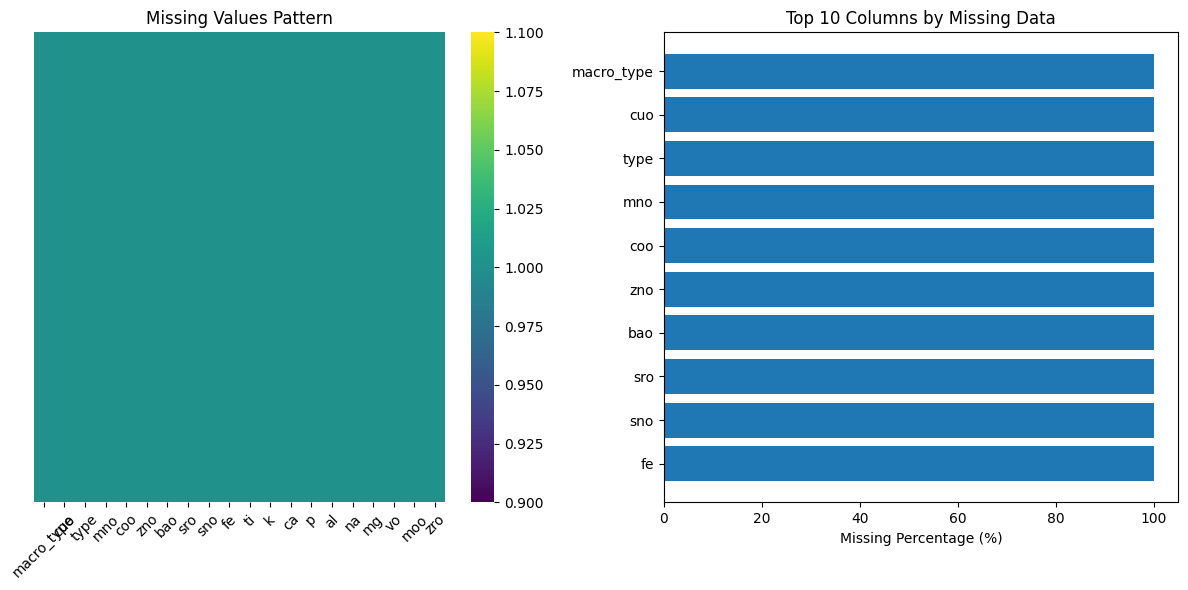

In [20]:
# ============================================================================
# CELL 5: Missing Values Analysis
# ============================================================================

print("\n" + "="*60)
print("MISSING VALUES ANALYSIS")
print("="*60)

# Calculate missing values
missing_data = df_clean.isnull().sum()
missing_percent = (missing_data / len(df_clean)) * 100

# Create missing values summary
missing_summary = pd.DataFrame({
    'Column': missing_data.index,
    'Missing_Count': missing_data.values,
    'Missing_Percentage': missing_percent.values,
    'Data_Type': df_clean.dtypes.values
}).sort_values('Missing_Count', ascending=False)

# Show columns with missing values
columns_with_missing = missing_summary[missing_summary['Missing_Count'] > 0]

if len(columns_with_missing) > 0:
    print("Columns with missing values:")
    print(columns_with_missing.to_string(index=False))
    
    # Visualize missing data pattern
    plt.figure(figsize=(12, 6))
    
    # Missing values heatmap
    plt.subplot(1, 2, 1)
    missing_cols = columns_with_missing.head(20)['Column'].tolist()
    if missing_cols:
        sns.heatmap(df_clean[missing_cols].isnull(), 
                   cbar=True, yticklabels=False, cmap='viridis')
        plt.title('Missing Values Pattern')
        plt.xticks(rotation=45)
    
    # Missing values bar chart
    plt.subplot(1, 2, 2)
    top_missing = columns_with_missing.head(10)
    plt.barh(top_missing['Column'], top_missing['Missing_Percentage'])
    plt.xlabel('Missing Percentage (%)')
    plt.title('Top 10 Columns by Missing Data')
    plt.gca().invert_yaxis()
    
    plt.tight_layout()
    plt.show()
    
else:
    print("✅ No missing values found in the dataset")


In [21]:
# ============================================================================
# CELL 6: Duplicate Rows Analysis
# ============================================================================

print("\n" + "="*60)
print("DUPLICATE ROWS ANALYSIS")
print("="*60)

# Check for complete duplicates
total_duplicates = df_clean.duplicated().sum()
print(f"Complete duplicate rows: {total_duplicates}")

if total_duplicates > 0:
    print("\nDuplicate rows found:")
    duplicate_rows = df_clean[df_clean.duplicated(keep=False)]
    print(duplicate_rows)
    
    # Option to remove duplicates
    df_clean = df_clean.drop_duplicates()
    print(f"After removing duplicates: {df_clean.shape}")
else:
    print("✅ No duplicate rows found")

# Check for duplicates in key identifier columns
id_columns = [col for col in df_clean.columns if 'id' in col.lower() or 'sample' in col.lower()]
if id_columns:
    print(f"\nChecking identifier columns: {id_columns}")
    for col in id_columns:
        duplicates = df_clean[col].duplicated().sum()
        if duplicates > 0:
            print(f"  {col}: {duplicates} duplicate values")
        else:
            print(f"  {col}: ✅ No duplicates")



DUPLICATE ROWS ANALYSIS
Complete duplicate rows: 0
✅ No duplicate rows found

Checking identifier columns: ['sample_id', 'sample', 'site_id']
  sample_id: ✅ No duplicates
  sample: ✅ No duplicates
  site_id: 117 duplicate values


In [22]:
# ============================================================================
# CELL 7: Data Types Analysis and Cleaning
# ============================================================================

print("\n" + "="*60)
print("DATA TYPES ANALYSIS")
print("="*60)

# Show current data types
print("Current data types:")
print(df_clean.dtypes.value_counts())

# Identify numeric columns that might be stored as text
print(f"\nColumns analysis:")
for col in df_clean.columns:
    dtype = df_clean[col].dtype
    unique_count = df_clean[col].nunique()
    sample_values = df_clean[col].dropna().head(3).tolist()
    
    print(f"{col:<20} | {str(dtype):<10} | {unique_count:>3} unique | Sample: {sample_values}")

# Convert object columns to numeric where appropriate
print(f"\nAttempting to convert object columns to numeric...")

# Define columns that should stay as text (metadata)
text_columns = [
    'sample_id', 'sample', 'site_id', 'site', 'chronology1', 'chronology2', 
    'original_chronology', 'translucency', 'colour', 'original_colour', 
    'macro_type', 'type', 'macro_composition', 'composition', 'original_composition'
]

numeric_conversions = 0
for col in df_clean.columns:
    if df_clean[col].dtype == 'object':
        # Skip metadata columns - keep as text
        if col in text_columns:
            print(f"  📝 Keeping {col} as text (metadata)")
            continue
            
        # Try to convert other object columns to numeric
        original_values = df_clean[col].copy()
        try:
            converted = pd.to_numeric(df_clean[col], errors='coerce')
            # Only convert if we don't lose too much data (less than 50% becomes NaN)
            na_before = df_clean[col].isna().sum()
            na_after = converted.isna().sum()
            
            if (na_after - na_before) / len(df_clean) < 0.5:  # Less than 50% data loss
                df_clean[col] = converted
                numeric_conversions += 1
                print(f"  ✅ Converted {col} to numeric")
            else:
                print(f"  📝 Keeping {col} as text (would lose too much data)")
        except:
            print(f"  ⚠️ Could not convert {col} to numeric (keeping as text)")

print(f"Converted {numeric_conversions} columns to numeric")


DATA TYPES ANALYSIS
Current data types:
float64    67
object     22
int64       2
Name: count, dtype: int64

Columns analysis:
sample_id            | object     | 128 unique | Sample: ['phelps2016_90', 'phelps2016_99', 'phelps2016_08']
sample               | object     | 128 unique | Sample: ['RAM 5947 08', 'RAM 5947 20', 'AH 3746 05']
site_id              | object     |  11 unique | Sample: ['RAM', 'RAM', 'AHI ']
site                 | object     |  11 unique | Sample: ['Ramla', 'Ramla', ' Ahihud']
chronology1          | int64      |   4 unique | Sample: [8, 8, 8]
chronology2          | int64      |   4 unique | Sample: [8, 8, 8]
original_chronology  | object     |   6 unique | Sample: ['Early-mid 8th century, Umayyad', 'Early-mid 8th century, Umayyad', 'Early-mid 8th century, Umayyad']
translucency         | object     |   1 unique | Sample: ['translucent', 'translucent', 'translucent']
colour               | object     |   6 unique | Sample: ['blue', 'blue', 'blue_green']
original_

In [24]:
# ============================================================================
# CELL 8: Outlier Detection
# ============================================================================

print("\n" + "="*60)
print("OUTLIER DETECTION")
print("="*60)

# Get numeric columns
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numeric columns for outlier analysis: {len(numeric_cols)}")

if numeric_cols:
    # Calculate outliers using IQR method
    outlier_summary = []
    
    for col in numeric_cols:
        if df_clean[col].notna().sum() > 0:  # Only if column has data
            Q1 = df_clean[col].quantile(0.25)
            Q3 = df_clean[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)][col]
            outlier_count = len(outliers)
            
            outlier_summary.append({
                'Column': col,
                'Outlier_Count': outlier_count,
                'Outlier_Percentage': (outlier_count / len(df_clean)) * 100,
                'Min_Value': df_clean[col].min(),
                'Max_Value': df_clean[col].max(),
                'Lower_Bound': lower_bound,
                'Upper_Bound': upper_bound
            })
    
    outlier_df = pd.DataFrame(outlier_summary).sort_values('Outlier_Count', ascending=False)
    
    # Show columns with outliers
    outliers_found = outlier_df[outlier_df['Outlier_Count'] > 0]
    if len(outliers_found) > 0:
        print("Columns with outliers:")
        print(outliers_found.to_string(index=False))
    else:
        print("✅ No outliers detected using IQR method")

       


OUTLIER DETECTION
Numeric columns for outlier analysis: 78
Columns with outliers:
     Column  Outlier_Count  Outlier_Percentage  Min_Value    Max_Value  Lower_Bound  Upper_Bound
         pb             20            15.62500   1.788717  7769.029065   -43.263673    85.235746
         mn             18            14.06250 125.460113 14425.611178   103.698340   318.503697
         cu             17            13.28125   1.334579  1252.424122   -23.510293    48.854460
         bi             15            11.71875   0.000217     2.819795    -0.007091     0.022997
          w             14            10.93750   0.041888     0.369617     0.030851     0.117704
         zn             14            10.93750   6.378336  1088.782333    -3.742744    32.648049
         cr             13            10.15625   0.000000   208.475399    -8.430762    73.311301
         sb             10             7.81250   0.009036    77.001388    -2.757961     4.983094
         co              9             7.031

In [25]:
# ============================================================================
# CELL 9: Data Consistency Checks
# ============================================================================

print("\n" + "="*60)
print("DATA CONSISTENCY CHECKS")
print("="*60)

# Check for negative values in oxide/element columns (should be positive)
oxide_element_cols = [col for col in numeric_cols if any(x in col.lower() for x in ['o', 'sio', 'cao', 'al', 'na', 'mg', 'fe', 'ti', 'k'])]

negative_checks = []
for col in oxide_element_cols:
    negative_count = (df_clean[col] < 0).sum()
    if negative_count > 0:
        negative_checks.append({'Column': col, 'Negative_Values': negative_count})

if negative_checks:
    print("⚠️ Columns with negative values (may be data entry errors):")
    for check in negative_checks:
        print(f"  {check['Column']}: {check['Negative_Values']} negative values")
else:
    print("✅ No negative values in chemical composition columns")

# Check for unrealistic percentages (>100% in oxide data)
percentage_checks = []
for col in oxide_element_cols:
    if df_clean[col].notna().sum() > 0:
        max_val = df_clean[col].max()
        if max_val > 100:
            percentage_checks.append({'Column': col, 'Max_Value': max_val})

if percentage_checks:
    print("⚠️ Columns with values >100% (check if these are percentages):")
    for check in percentage_checks:
        print(f"  {check['Column']}: max value = {check['Max_Value']:.2f}")
else:
    print("✅ No unrealistic percentage values found")




DATA CONSISTENCY CHECKS
✅ No negative values in chemical composition columns
⚠️ Columns with values >100% (check if these are percentages):
  co: max value = 742.42


In [26]:
# ============================================================================
# CELL 10: Create Clean Dataset Summary
# ============================================================================

print("\n" + "="*60)
print("CLEAN DATASET SUMMARY")
print("="*60)

# Create final summary
summary_stats = {
    'Original_Shape': df_raw.shape,
    'Clean_Shape': df_clean.shape,
    'Rows_Removed': df_raw.shape[0] - df_clean.shape[0],
    'Columns_Standardized': len([1 for old, new in zip(original_columns, df_clean.columns) if old != new]),
    'Numeric_Columns': len(df_clean.select_dtypes(include=[np.number]).columns),
    'Text_Columns': len(df_clean.select_dtypes(include=['object']).columns),
    'Total_Missing_Values': df_clean.isnull().sum().sum(),
    'Completely_Empty_Columns': (df_clean.isnull().sum() == len(df_clean)).sum()
}

print("Cleaning Summary:")
for key, value in summary_stats.items():
    print(f"  {key.replace('_', ' ')}: {value}")

# Show final column list
print(f"\nFinal column list ({len(df_clean.columns)} columns):")
for i, col in enumerate(df_clean.columns, 1):
    dtype = df_clean[col].dtype
    missing = df_clean[col].isnull().sum()
    print(f"{i:2d}. {col:<25} ({dtype}) - {missing} missing")


CLEAN DATASET SUMMARY
Cleaning Summary:
  Original Shape: (128, 91)
  Clean Shape: (128, 91)
  Rows Removed: 0
  Columns Standardized: 56
  Numeric Columns: 78
  Text Columns: 13
  Total Missing Values: 3137
  Completely Empty Columns: 23

Final column list (91 columns):
 1. sample_id                 (object) - 0 missing
 2. sample                    (object) - 0 missing
 3. site_id                   (object) - 0 missing
 4. site                      (object) - 0 missing
 5. chronology1               (int64) - 0 missing
 6. chronology2               (int64) - 0 missing
 7. original_chronology       (object) - 0 missing
 8. translucency              (object) - 0 missing
 9. colour                    (object) - 0 missing
10. original_colour           (object) - 0 missing
11. macro_type                (float64) - 128 missing
12. type                      (float64) - 128 missing
13. macro_composition         (object) - 0 missing
14. composition               (object) - 0 missing
15. origi

In [27]:
# ============================================================================
# CELL 11: Save Cleaned Dataset
# ============================================================================

print("\n" + "="*60)
print("SAVING CLEANED DATASET")
print("="*60)

# Create processed data directory if it doesn't exist
processed_dir = Path('/app/data/processed')
processed_dir.mkdir(exist_ok=True)

# Save cleaned dataset
output_path = processed_dir / 'phelps_2016_cleaned.xlsx'
df_clean.to_excel(output_path, index=False)
print(f"✅ Cleaned dataset saved to: {output_path}")

# Also save as CSV for easier use
csv_path = processed_dir / 'phelps_2016_cleaned.csv'
df_clean.to_csv(csv_path, index=False)
print(f"✅ Cleaned dataset saved to: {csv_path}")

# Save cleaning report
report_path = processed_dir / 'cleaning_report.txt'
with open(report_path, 'w') as f:
    f.write("Data Cleaning Report - Phelps et al. 2016\n")
    f.write("="*50 + "\n\n")
    f.write(f"Original dataset: {df_raw.shape[0]} rows × {df_raw.shape[1]} columns\n")
    f.write(f"Cleaned dataset: {df_clean.shape[0]} rows × {df_clean.shape[1]} columns\n")
    f.write(f"Rows removed: {df_raw.shape[0] - df_clean.shape[0]}\n")
    f.write(f"Columns standardized: {summary_stats['Columns_Standardized']}\n")
    f.write(f"Total missing values: {summary_stats['Total_Missing_Values']}\n")
    f.write("\nColumn name changes:\n")
    for old, new in zip(original_columns, df_clean.columns):
        if old != new:
            f.write(f"  '{old}' → '{new}'\n")

print(f"✅ Cleaning report saved to: {report_path}")



SAVING CLEANED DATASET
✅ Cleaned dataset saved to: /app/data/processed/phelps_2016_cleaned.xlsx
✅ Cleaned dataset saved to: /app/data/processed/phelps_2016_cleaned.csv
✅ Cleaning report saved to: /app/data/processed/cleaning_report.txt


In [28]:
# ============================================================================
# CELL 12: Data Validation
# ============================================================================

print("\n" + "="*60)
print("FINAL DATA VALIDATION")
print("="*60)

# Quick validation checks
print("Final validation checks:")

# Check if we still have data
if len(df_clean) == 0:
    print("❌ WARNING: No data remaining after cleaning!")
else:
    print(f"✅ Dataset contains {len(df_clean)} samples")

# Check key columns exist (for glass analysis)
key_columns = ['sample_id', 'original_composition', 'cao', 'alo', 'nao', 'sio']
missing_key_cols = [col for col in key_columns if col not in df_clean.columns]
if missing_key_cols:
    print(f"⚠️ Missing key columns: {missing_key_cols}")
else:
    print("✅ All key columns present")

# Check composition groups
if 'original_composition' in df_clean.columns:
    comp_groups = df_clean['original_composition'].value_counts()
    print(f"✅ Composition groups found: {len(comp_groups)}")
    print(comp_groups)

print("\n" + "="*60)
print("DATA CLEANING COMPLETE!")
print("="*60)
print("Ready for analysis!")
print(f"Use the cleaned dataset: df_clean")
print(f"Cleaned files saved in: /app/data/processed/")

# Make cleaned dataframe available for next steps
print(f"\nDataset preview:")
df_clean.head()


FINAL DATA VALIDATION
Final validation checks:
✅ Dataset contains 128 samples
✅ All key columns present
✅ Composition groups found: 6
original_composition
N-1         54
N-3         50
N-2         17
N-3 (Co)     3
N-4          2
N-3 (Mn)     2
Name: count, dtype: int64

DATA CLEANING COMPLETE!
Ready for analysis!
Use the cleaned dataset: df_clean
Cleaned files saved in: /app/data/processed/

Dataset preview:


,sample_id,sample,site_id,site,chronology1,chronology2,original_chronology,translucency,colour,original_colour,macro_type,type,macro_composition,composition,original_composition,sio,nao,cao,alo,ko,mgo,feo,mno,tio,po,cuo,coo,pbo,sbo,sno,sro,bao,zno,cro,zro,moo,vo,li,b,na,mg,al,p,k,ca,ti,v,cr,mn,fe,co,ni,cu,zn,ga,as,rb,sr,y,zr,nb,mo,cd,in,sn,sb,cs,ba,la,ce,pr,nd,sm,eu,gd,tb,dy,ho,er,tm,yb,lu,hf,ta,w,pt,au,pb,bi,th,u
0,phelps2016_90,RAM 5947 08,RAM,Ramla,8,8,"Early-mid 8th century, Umayyad",translucent,blue,smokey pale blue,NaN,NaN,egypt_1,egypt_1,N-3,69.864728,14.496476,9.660532,2.636631,0.212505,0.521082,0.987554,NaN,0.287415,0.091603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,204.017006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.766654,40.621110,194.041255,NaN,3.431120,7.050818,3.468231,17.060637,3.366861,2.703013,4.357285,196.617150,8.926586,265.745520,4.845577,0.012850,0.107791,NaN,18.407348,0.158813,0.030797,167.917932,8.878543,16.541480,2.091641,8.317145,1.581652,0.374280,1.444857,0.241404,1.479647,0.309358,0.891833,0.120690,1.042985,0.140898,5.900164,0.284891,0.059129,0.001937,bdl,6.197818,0.010017,2.075708,1.201727
1,phelps2016_99,RAM 5947 20,RAM,Ramla,8,8,"Early-mid 8th century, Umayyad",translucent,blue,cobalt blue,NaN,NaN,egypt_1,egypt_1,N-3,70.518548,12.503187,9.896012,2.012075,0.976668,1.778057,0.793543,NaN,0.194823,0.213082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,295.383646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.580097,45.507714,1107.217816,NaN,12.230850,11.820332,67.279574,46.650019,2.667155,2.993090,6.712272,397.537245,7.735308,205.851635,3.636244,0.914803,0.259541,NaN,32.229106,4.488625,0.049693,161.819249,8.170596,15.711262,1.828348,6.916028,1.535438,0.381274,1.033363,0.206193,1.214839,0.289110,0.786686,0.110870,0.806042,0.110215,4.860550,0.215671,0.122145,0.015401,0.015946,337.487005,0.062638,1.738104,0.962323
2,phelps2016_08,AH 3746 05,AHI,Ahihud,8,8,"Early-mid 8th century, Umayyad",translucent,blue_green,pale blue,NaN,NaN,egypt_1,egypt_1,N-3,71.232169,12.852251,9.516464,2.827478,0.619012,0.736862,0.755832,NaN,0.169598,0.184722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.030285,267.893297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.518373,33.394416,1615.220450,NaN,5.294652,9.184272,123.938698,35.127970,3.549956,2.612769,8.257851,364.710419,8.760924,148.355691,3.185880,0.522913,NaN,NaN,38.261211,77.001388,NaN,214.479199,7.975384,15.139348,1.859870,7.589613,1.503560,0.314938,1.413000,0.211740,1.346036,0.270256,0.770924,0.115964,0.762477,0.112779,3.263992,0.179061,0.118618,0.012942,0.018502,306.790659,0.017358,1.460000,0.974371
3,phelps2016_10,AH 3746 09,AHI,Ahihud,8,8,"Early-mid 8th century, Umayyad",translucent,blue_green,greenish blue,NaN,NaN,egypt_1,egypt_1,N-3,70.252829,12.305012,10.634114,3.059662,0.627462,0.783204,0.809936,NaN,0.179708,0.227146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.263923,277.482247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.317224,35.768487,1621.373473,NaN,5.147274,9.365795,124.933714,46.807310,3.556084,3.100774,9.067838,392.368862,9.773685,164.655851,3.386776,0.644668,NaN,NaN,45.235583,70.705931,NaN,227.299352,8.651823,16.192423,2.071317,8.202734,1.639363,0.303017,1.474446,0.242747,1.430890,0.311599,0.782933,0.128886,0.913678,0.142259,3.501249,0.186775,0.141666,bdl,0.019603,294.871124,0.019761,1.632004,1.093745
4,phelps2016_100,RAM 5947 21,RAM,Ramla,8,8,"Early-mid 8th century, Umayyad",translucent,blue_green,greenish blue,NaN,NaN,egypt_1,egypt_1,N-3,68.041447,16.624375,9.434951,2.381466,0.387269,0.536134,0.977467,NaN,0.275471,0.111490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.142882,232.146401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.963201,60.792735,220.770326,NaN,3.218177,7.615037,8.528913,19.275766,3.360279,5.670208,7.344182,209.446486,8.675460,280.039856,4.681108,0.464618,0.040237,NaN,14.133251,0.600557,0.094495,173.519035,8.424069,16.236973,2.017020,7.962711,1.589549,0.440029,1.257801,0.227246,1.360782,0.280726,0.841293,0.115741,0.975025,0.144566,6.381845,0.264413,0.139399,bdl,0